In [19]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer, load_digits, fetch_lfw_people, load_wine, fetch_20newsgroups
from sklearn.decomposition import PCA, NMF, TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.preprocessing import StandardScaler
import numpy as np


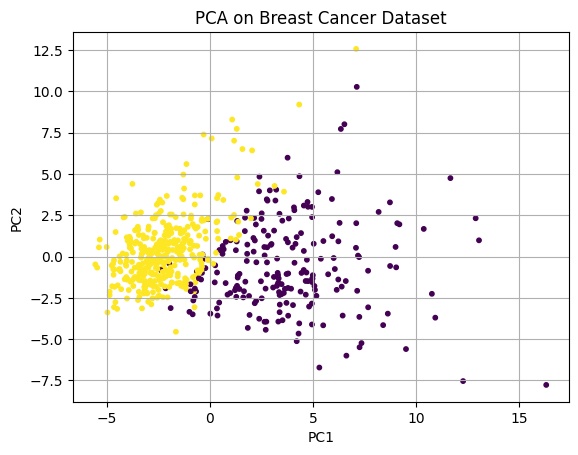

In [20]:
breast_data = load_breast_cancer()
X_breast = StandardScaler().fit_transform(breast_data.data)
pca = PCA(n_components=2)
X_breast_pca = pca.fit_transform(X_breast)

plt.figure()
plt.scatter(X_breast_pca[:, 0], X_breast_pca[:, 1], c=breast_data.target, cmap='viridis', s=10)
plt.title('PCA on Breast Cancer Dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()


# Widzimy wyraźny podział na dwie grupy, co sugeruje, że PCA skutecznie oddziela przypadki raka na dwie grupy. Prawdopodobnie zlośliwe i łagodne lub nowe i rozwinięte.

In [21]:
breast_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

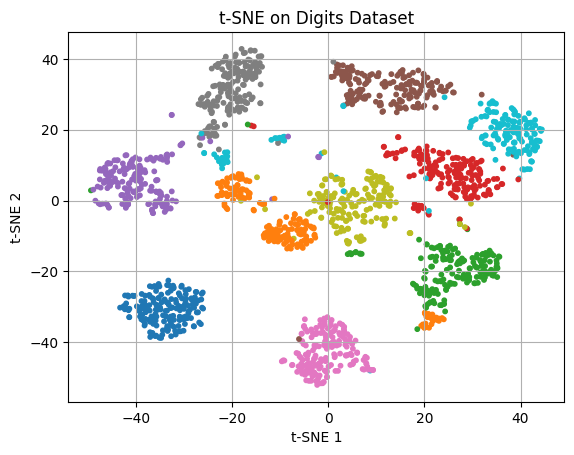

In [22]:
digits = load_digits()
X_digits = StandardScaler().fit_transform(digits.data)
tsne = TSNE(n_components=2, random_state=42)
X_digits_tsne = tsne.fit_transform(X_digits)

plt.figure()
plt.scatter(X_digits_tsne[:, 0], X_digits_tsne[:, 1], c=digits.target, cmap='tab10', s=10)
plt.title('t-SNE on Digits Dataset')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.grid(True)
plt.show()

# Wyniki redukcji wymiarowości metodą t-SNE pokazują wyraźnie oddzielone skupiska odpowiadające poszczególnym cyfrom. Większość klas cyfr tworzy zwarte i odseparowane grupy, co sugeruje, że dane zawierają wyraźne wzorce różnicujące cyfry. Można podejrzewać, że pojedyncze punkty znajdujące się między klasami to przykłady trudne do rozpoznania lub błędnie sklasyfikowane.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


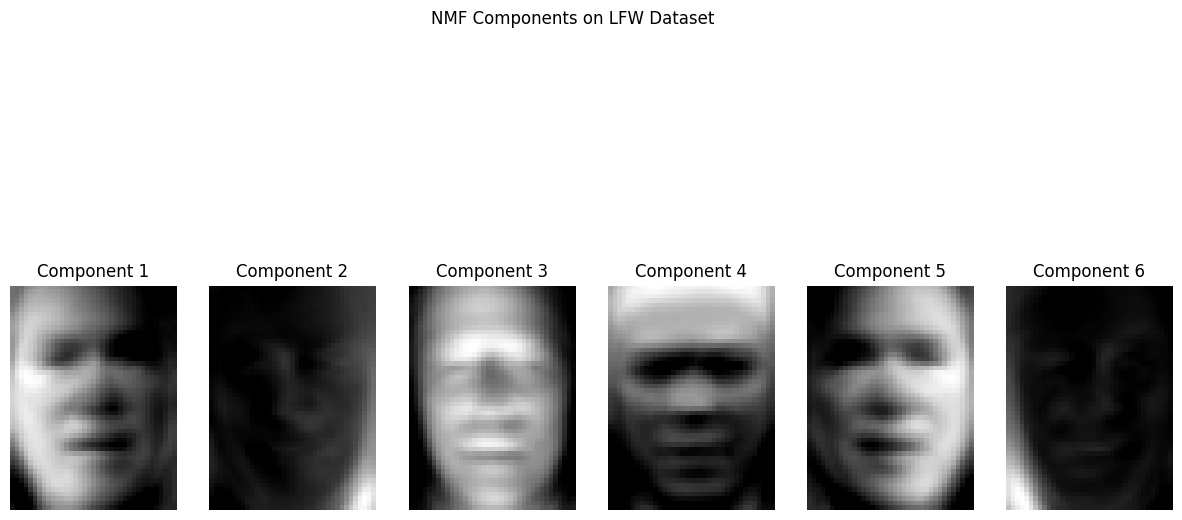

In [23]:

lfw = fetch_lfw_people(min_faces_per_person=40, resize=0.4)
X_faces = lfw.data
n_components = 6
nmf = NMF(n_components=n_components, init='nndsvda', random_state=0, max_iter=500)
W = nmf.fit_transform(X_faces)
H = nmf.components_

fig, axes = plt.subplots(1, n_components, figsize=(15, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(H[i].reshape(lfw.images.shape[1], lfw.images.shape[2]), cmap='gray')
    ax.set_title(f'Component {i+1}')
    ax.axis('off')
plt.suptitle('NMF Components on LFW Dataset')
plt.show()

# Wizualizacja składników NMF pokazuje, że algorytm potrafi wydzielić charakterystyczne fragmenty twarzy, takie jak oczy, usta czy kształt głowy. Każdy składnik reprezentuje pewien wzorzec, który może być kombinowany z innymi w celu odtworzenia oryginalnych obrazów. Można podejrzewać, że niektóre komponenty odpowiadają za światło i cień, co może wpływać na rozpoznawanie twarzy w różnych warunkach oświetleniowych.

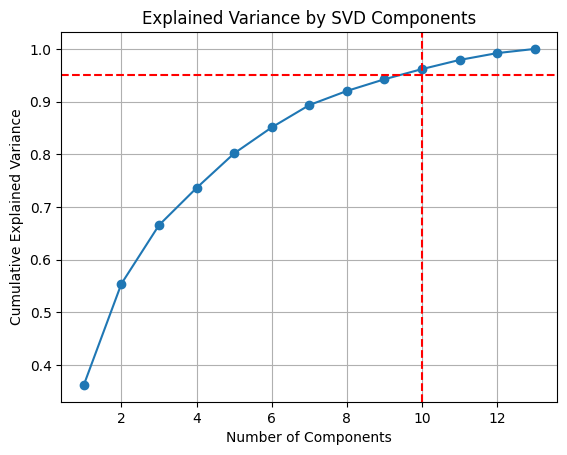

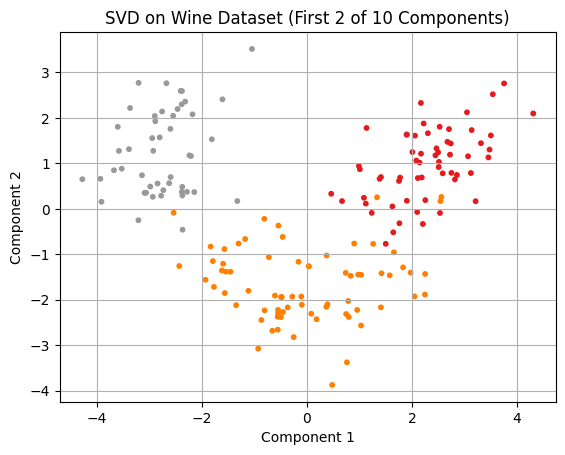

In [24]:
wine = load_wine()
X_wine = StandardScaler().fit_transform(wine.data)
svd = TruncatedSVD(n_components=len(wine.feature_names))
X_wine_svd = svd.fit_transform(X_wine)
explained_variance = np.cumsum(svd.explained_variance_ratio_)


n_components_95 = np.argmax(explained_variance >= 0.95) + 1
svd_opt = TruncatedSVD(n_components=n_components_95)
X_wine_reduced = svd_opt.fit_transform(X_wine)



plt.figure()
plt.plot(np.arange(1, len(explained_variance)+1), explained_variance, marker='o')
plt.axhline(0.95, color='r', linestyle='--')
plt.axvline(n_components_95, color='r', linestyle='--')
plt.title('Explained Variance by SVD Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

plt.figure()
plt.scatter(X_wine_reduced[:, 0], X_wine_reduced[:, 1], c=wine.target, cmap='Set1', s=10)
plt.title(f'SVD on Wine Dataset (First 2 of {n_components_95} Components)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.show()

# Na wykresie widoczne są trzy wyraźnie oddzielone klastry odpowiadające trzem odmianom wina. Metoda SVD skutecznie zredukowała wymiarowość danych, zachowując istotne różnice między klasami. Można podejrzewać, że składniki takie jak alkohol, kwasy fenolowe czy proantocyjanidyny miały największy wpływ na rozróżnienie tych odmian.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


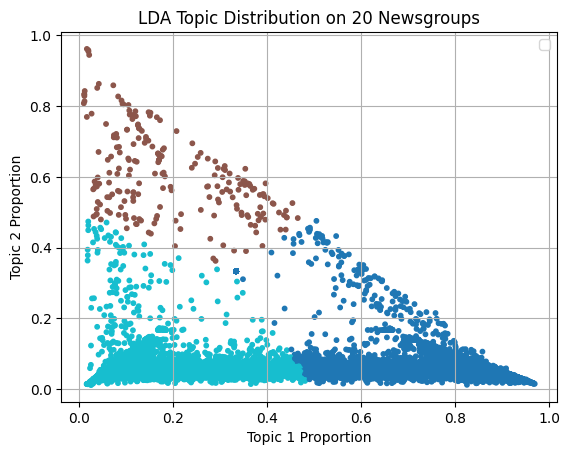

In [25]:
newsgroups = fetch_20newsgroups(remove=('headers', 'footers', 'quotes'), subset='all')
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
X_news = vectorizer.fit_transform(newsgroups.data)
lda = LatentDirichletAllocation(n_components=3, random_state=0)
X_lda = lda.fit_transform(X_news)

plt.figure()
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=np.argmax(X_lda, axis=1), cmap='tab10', s=10)
plt.title('LDA Topic Distribution on 20 Newsgroups')
plt.xlabel('Topic 1 Proportion')
plt.ylabel('Topic 2 Proportion')
plt.legend()
plt.grid(True)
plt.show()

# Można zauważyć trzy wyraźne skupiska, co sugeruje, że model skutecznie wyodrębnił dwa dominujące tematy w danych i grupę tematów niepowiazanych. Obecność dokumentów z proporcjami mieszanymi może wskazywać na teksty poruszające zagadnienia należące do więcej niż jednej kategorii.
